### 1)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
df = pd.read_csv("housing.csv")

In [81]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [83]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2)

In [79]:
df=pd.read_csv("housing.csv")
df.drop(["id", "Unnamed: 0"], axis=1, inplace = True)

In [80]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
missing_data = df.isnull()

In [72]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    21613
Name: id, dtype: int64

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    2161

In [84]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Now we will replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' and the same with the columns 'bathrooms'

In [85]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [86]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [87]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### 3)

In [5]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

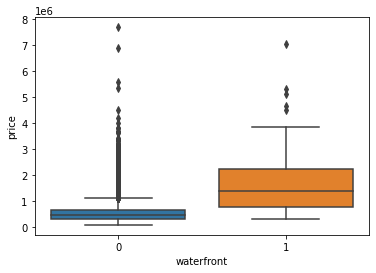

In [7]:
sns.boxplot(x="waterfront", y="price", data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

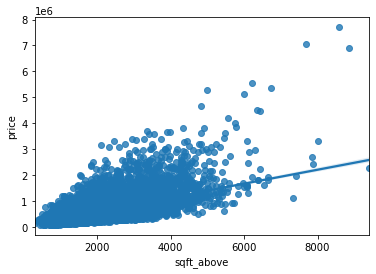

In [8]:
sns.regplot(x="sqft_above", y="price", data=df)

As the sqft_above goes up, the price goes up: this indicates a positive direct correlation between these two variables. 

In [88]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

As we can see above the correlation between price and sqft_living is 0.702035 which is the highest values among them which is closest to 1, so sqft_living is the most correlated with price.

### 4a)

In [89]:
lm = LinearRegression()

In [90]:
X = df[['long']]
Y = df['price']

In [91]:
lm.fit(X,Y)

LinearRegression()

In [92]:
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.00046769430149029567


We can say that ~0.046% of the variation of the price is explained by this simple linear model "long".

### 4b)

In [93]:
lm1 = LinearRegression()

In [94]:
X = df[['sqft_living']]
Y = df['price']

In [95]:
lm1.fit(X,Y)

LinearRegression()

In [96]:
print('The R-square is: ', lm1.score(X, Y))

The R-square is:  0.4928532179037931


We can say that ~49.28% of the variation of the price is explained by this simple linear model "sqft_living".

### 4c)

In [97]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade",
           "sqft_living"]

In [98]:
lm = LinearRegression()
X = df[['floors']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.06594310068341092

In [99]:
lm = LinearRegression()
X = df[['waterfront']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.07095267538578331

In [100]:
lm = LinearRegression()
X = df[['lat']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.09425113672917462

In [101]:
lm = LinearRegression()
X = df[['bedrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.09535546506131365

In [102]:
lm = LinearRegression()
X = df[['sqft_basement']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.104856815269744

In [103]:
lm = LinearRegression()
X = df[['view']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.15784211584121532

In [104]:
lm = LinearRegression()
X = df[['bathrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.27639993060314383

In [105]:
lm = LinearRegression()
X = df[['sqft_living15']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.3426684607560172

In [106]:
lm = LinearRegression()
X = df[['sqft_above']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.3667117528382793

In [107]:
lm = LinearRegression()
X = df[['grade']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.44546848610928724

In [108]:
lm = LinearRegression()
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

### 5)

In [109]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [110]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [111]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [112]:
pipe.score(X,Y)

0.5327430940591443

### 6)

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [114]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade",
           "sqft_living"]    
X = df[features ]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


### 7)

In [115]:
from sklearn.linear_model import Ridge

In [116]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                     'sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                   'sqft_living15','sqft_above','grade','sqft_living']])

In [117]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [118]:
RidgeModel.score(x_train_pr, y_train)

0.7418167438765637

### 8)

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                     'sqft_living15','sqft_above','grade','sqft_living']])
x_polly=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                  'sqft_living15','sqft_above','grade','sqft_living']])

In [122]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_train_pr, y_train)

0.7418167438765637

In [123]:
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                   'sqft_living15','sqft_above','grade','sqft_living']])

x_polly=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms',
                                 'sqft_living15','sqft_above','grade','sqft_living']])

In [124]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_test_pr, y_test)
RidgeModel.score(x_test_pr, y_test)

0.7666545737104892